# Demand Forecasting and Inventory Optimization: Data Generation and EDA

**Objective:** This notebook focuses on generating a synthetic dataset for a seasonal product's sales history, which will serve as the foundation for our demand forecasting and inventory optimization project. Following data generation, a comprehensive Exploratory Data Analysis (EDA) will be performed to understand the dataset's characteristics, including trends, seasonality, and potential anomalies.

**Author:** Muhammad Rizky Raihan

**Date:** 2025-05-26
___

## 1. Setup and Library Imports

We begin by importing all necessary Python libraries for data generation, manipulation, and visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Set plot style for better aesthetics
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

## 2. Synthetic Data Generation

To simulate real-world sales patterns for a seasonal product, we will generate a synthetic dataset. As discussed, we'll model sales of a "Seasonal Beverage" (e.g., an energy drink that sells more in warmer months). The data will incorporate:
- A **base sales level**.
- A **linear trend** (optional, representing slow growth/decline).
- A **strong seasonal component** (e.g., sine wave to simulate summer peaks).
- **Random noise** to mimic natural fluctuations.

**Assumptions for Data Generation:**
- **Daily sales data** over a period of 4 years (verification: this period is chosen to clearly capture annual seasonality patterns).
- **Dominant annual seasonality**, peaking around mid-year.
- **Normally distributed noise** (verification: simplifies the simulation; real-world noise might follow other distributions).

___

#### **Data Generation Logic**

In [2]:
# Define parameters for synthetic data generation
start_date = datetime(2021, 1, 1)
end_date = datetime(2024, 12, 31) # 4 full years of data
date_range = pd.date_range(start=start_date, end=end_date, freq='D')
n_points = len(date_range)

# Base sales level
base_sales = 100

# Linear trend: small daily increase (e.g., 0.05 units per day)
# This results in a total increase of 0.05 * 365 * 4 = 73 units over 4 years.
linear_trend_slope = 0.05
linear_trend = np.arange(n_points) * linear_trend_slope

#### Seasonal Component: Annual Cycle (365.25 Days)

To realistically model annual seasonality in time-series data, we use a **sinusoidal function** that completes **one full cycle over 365.25 days**, accounting for leap years.

##### General Form

$$
y_{\text{seasonal}}(t) = \sin\left(\frac{2\pi t}{P} + \phi\right)
$$

Where:

* $t$ is the time index (in days),
* $P = 365.25$ is the period (days in a year),
* $\phi$ is the **phase shift** (in radians) to control the timing of the peak.

---

##### Objective: Peak Around Mid-Year (July)

We want the **seasonal peak** to occur around **mid-year**, approximately **day 182–200**, corresponding to **July**.

To shift the sine wave’s peak accordingly, we can calculate the appropriate **phase shift**.

---

##### Deriving the Phase Shift

We know that the sine function reaches its peak at:

$$
\frac{2\pi t}{P} + \phi = \frac{\pi}{2}
$$

Assuming we want the peak on **day 180**:

$$
\frac{2\pi \cdot 180}{365.25} + \phi = \frac{\pi}{2}
$$

Solving for $\phi$:

$$
\phi = \frac{\pi}{2} - \frac{2\pi \cdot 180}{365.25} \approx -1.56 \text{ radians}
$$

Thus, we can write:

$$
y_{\text{seasonal}}(t) = \sin\left(\frac{2\pi t}{365.25} - 1.56\right)
$$

---

##### Simpler Alternative: Shift Using Day-of-Year

Instead of using phase shift in radians, we can directly shift the peak using the **day of year** approach:

$$
y_{\text{seasonal}}(t) = \sin\left(2\pi \cdot \frac{\text{dayofyear} - X}{365.25}\right)
$$

Where:

* $X$ is the **day-of-year** at which you want the **peak**.

To center the peak in **early-to-mid July**, set:

$$
X = 182 \text{ to } 200
$$

For example, to center the peak on **July 10** (\~day 191):

$$
y_{\text{seasonal}}(t) = \sin\left(2\pi \cdot \frac{\text{dayofyear} - 191}{365.25}\right)
$$

This approach is intuitive, easy to implement, and avoids manual computation of $\phi$.

---

##### Summary

| Approach                | Equation                                                             | Peak Timing Control   |
| ----------------------- | -------------------------------------------------------------------- | --------------------- |
| Phase Shift             | $\sin\left(\frac{2\pi t}{365.25} + \phi\right)$, with $\phi = -1.56$ | Via phase $\phi$      |
| Day Shift (recommended) | $\sin\left(2\pi \cdot \frac{\text{dayofyear} - X}{365.25}\right)$    | Direct day offset $X$ |

---

In [5]:
# Seasonal component (annual cycle - 365.25 days per cycle for realism)
seasonal_amplitude = 50 # Max fluctuation due to seasonality
seasonal_component = seasonal_amplitude * np.sin(2 * np.pi * (date_range.dayofyear - 150) / 365.25) # Peak around July

# Random noise
np.random.seed(42) # For reproducibility
noise_std = 15 # Standard deviation of sales noise
noise = np.random.normal(loc=0, scale=noise_std, size=n_points)

# Combine components to get total sales
# --- CRUCIAL CORRECTION HERE (using np.maximum for robustness) ---
# Calculate raw sales first
raw_total_sales = base_sales + linear_trend + seasonal_component + noise

# Ensure sales are non-negative using np.maximum, then round and convert to int
# np.maximum(array, 0) will replace any value less than 0 with 0
total_sales_np = np.maximum(raw_total_sales, 0).round().astype(int)

# Create DataFrame using the processed NumPy array
df = pd.DataFrame({'Date': date_range, 'Sales': total_sales_np})
df.set_index('Date', inplace=True)

print("Generated Data Head:")
print(df.head())
print("\nGenerated Data Info:")
df.info()
print("\nGenerated Data Description:")
print(df.describe())

# Save the generated data to the raw data directory
output_path = '../data/raw/synthetic_seasonal_sales.csv'
df.to_csv(output_path)
print(f"\nSynthetic data saved to: {output_path}")

Generated Data Head:
            Sales
Date             
2021-01-01     80
2021-01-02     70
2021-01-03     81
2021-01-04     94
2021-01-05     67

Generated Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2021-01-01 to 2024-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   1461 non-null   int32
dtypes: int32(1)
memory usage: 17.1 KB

Generated Data Description:
             Sales
count  1461.000000
mean    137.180698
std      46.836646
min      16.000000
25%     100.000000
50%     139.000000
75%     174.000000
max     239.000000

Synthetic data saved to: ../data/raw/synthetic_seasonal_sales.csv


## 3. Exploratory Data Analysis (EDA)

Exploratory Data Analysis is a crucial step to understand the underlying patterns, potential issues, and statistical properties of our dataset. This informs subsequent feature engineering and model selection.

### 3.1. Time Series Plot

Visualizing the sales data over time is the most fundamental step to identify trends, seasonality, and outliers.

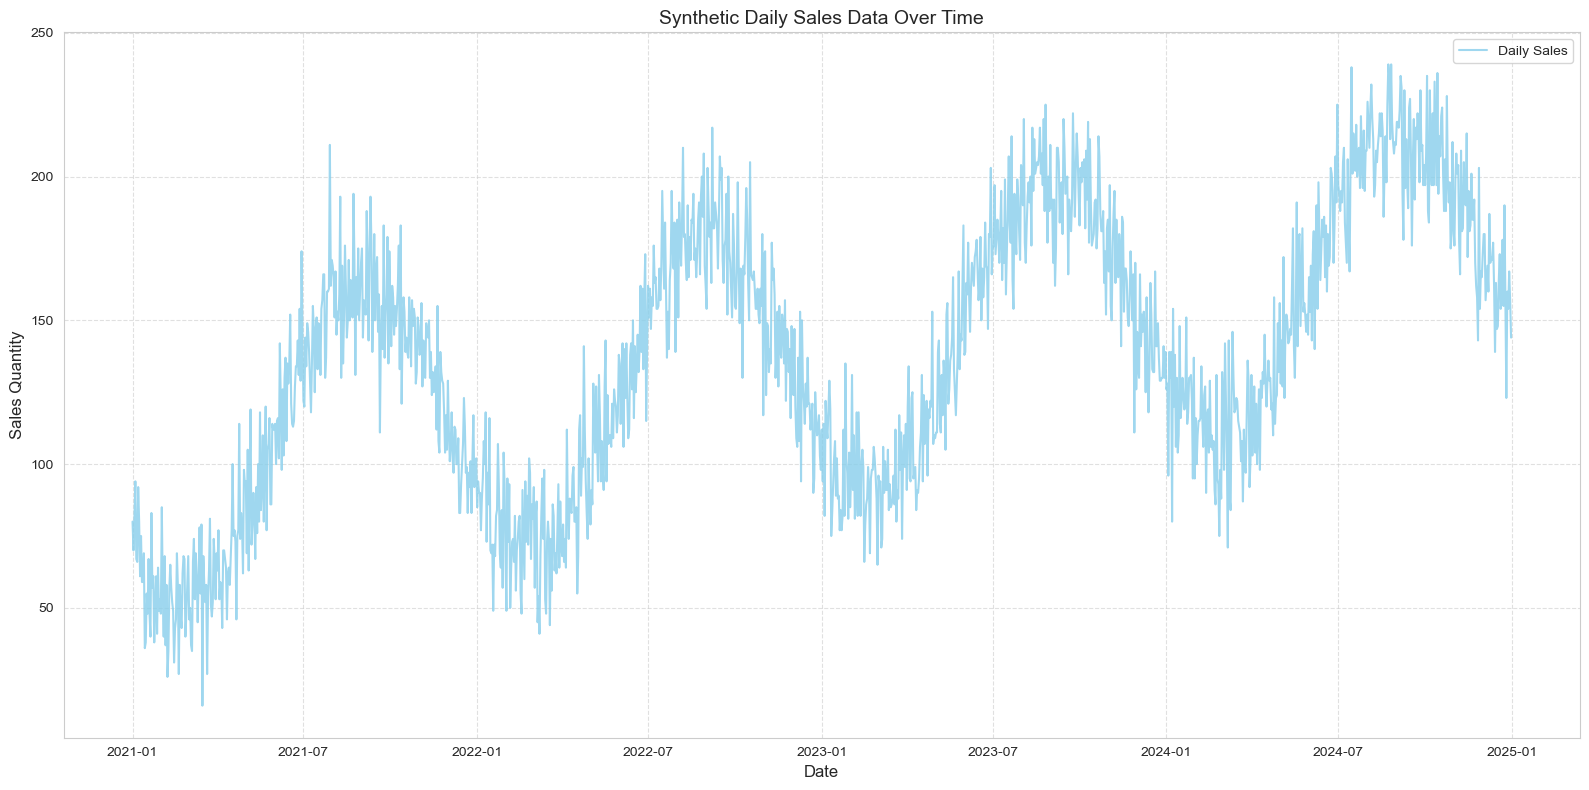

In [6]:
plt.figure(figsize=(16, 8))
plt.plot(df.index, df['Sales'], label='Daily Sales', color='skyblue', alpha=0.8)
plt.title('Synthetic Daily Sales Data Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 3.2. Resampling and Aggregation

Resampling the data to a weekly or monthly frequency can help in observing clearer seasonal patterns and long-term trends by smoothing out daily noise.

C:\Users\Raihan\AppData\Local\Temp\ipykernel_17888\1607641178.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df['Sales'].resample('M').sum().to_frame()


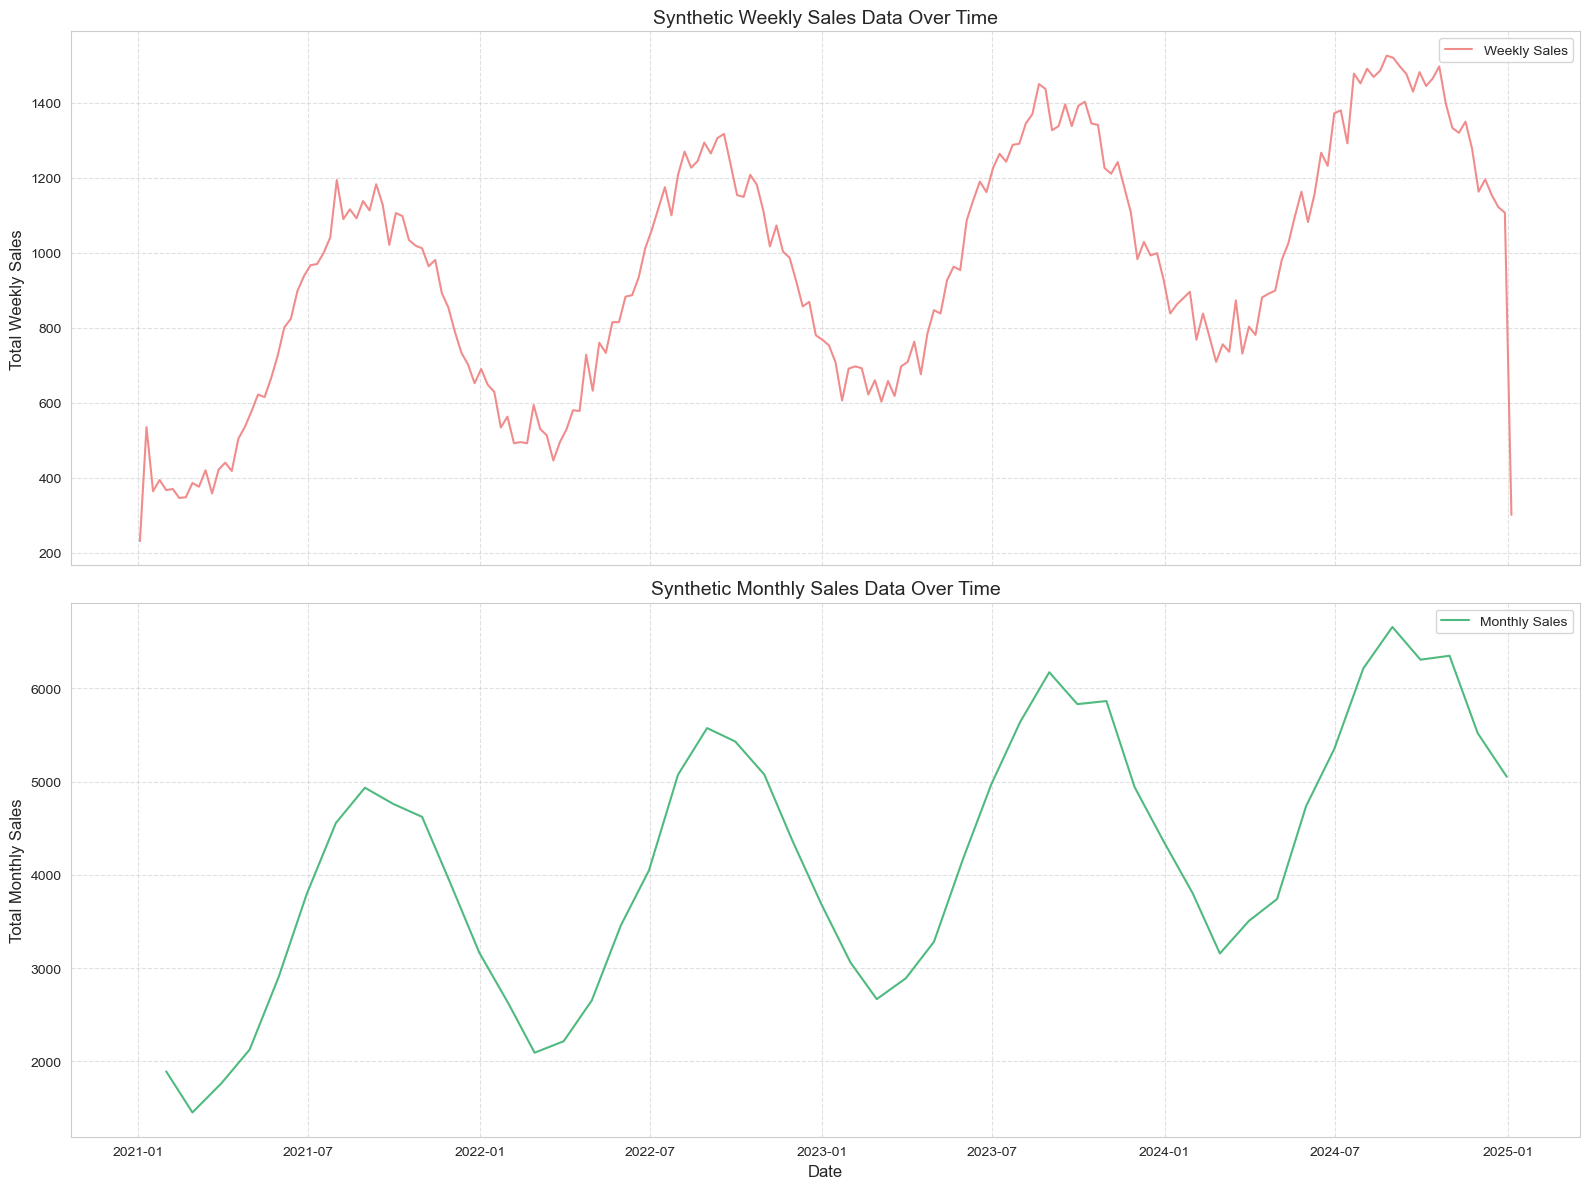

In [7]:
df_weekly = df['Sales'].resample('W').sum().to_frame()
df_monthly = df['Sales'].resample('M').sum().to_frame()

fig, axes = plt.subplots(2, 1, figsize=(16, 12), sharex=True)

# Weekly Sales Plot
axes[0].plot(df_weekly.index, df_weekly['Sales'], label='Weekly Sales', color='lightcoral', alpha=0.9)
axes[0].set_title('Synthetic Weekly Sales Data Over Time')
axes[0].set_ylabel('Total Weekly Sales')
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.6)

# Monthly Sales Plot
axes[1].plot(df_monthly.index, df_monthly['Sales'], label='Monthly Sales', color='mediumseagreen', alpha=0.9)
axes[1].set_title('Synthetic Monthly Sales Data Over Time')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Total Monthly Sales')
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

### 3.3. Seasonality Analysis (Year-over-Year Comparison)

To explicitly verify the annual seasonality, we can plot sales for each year on the same graph.

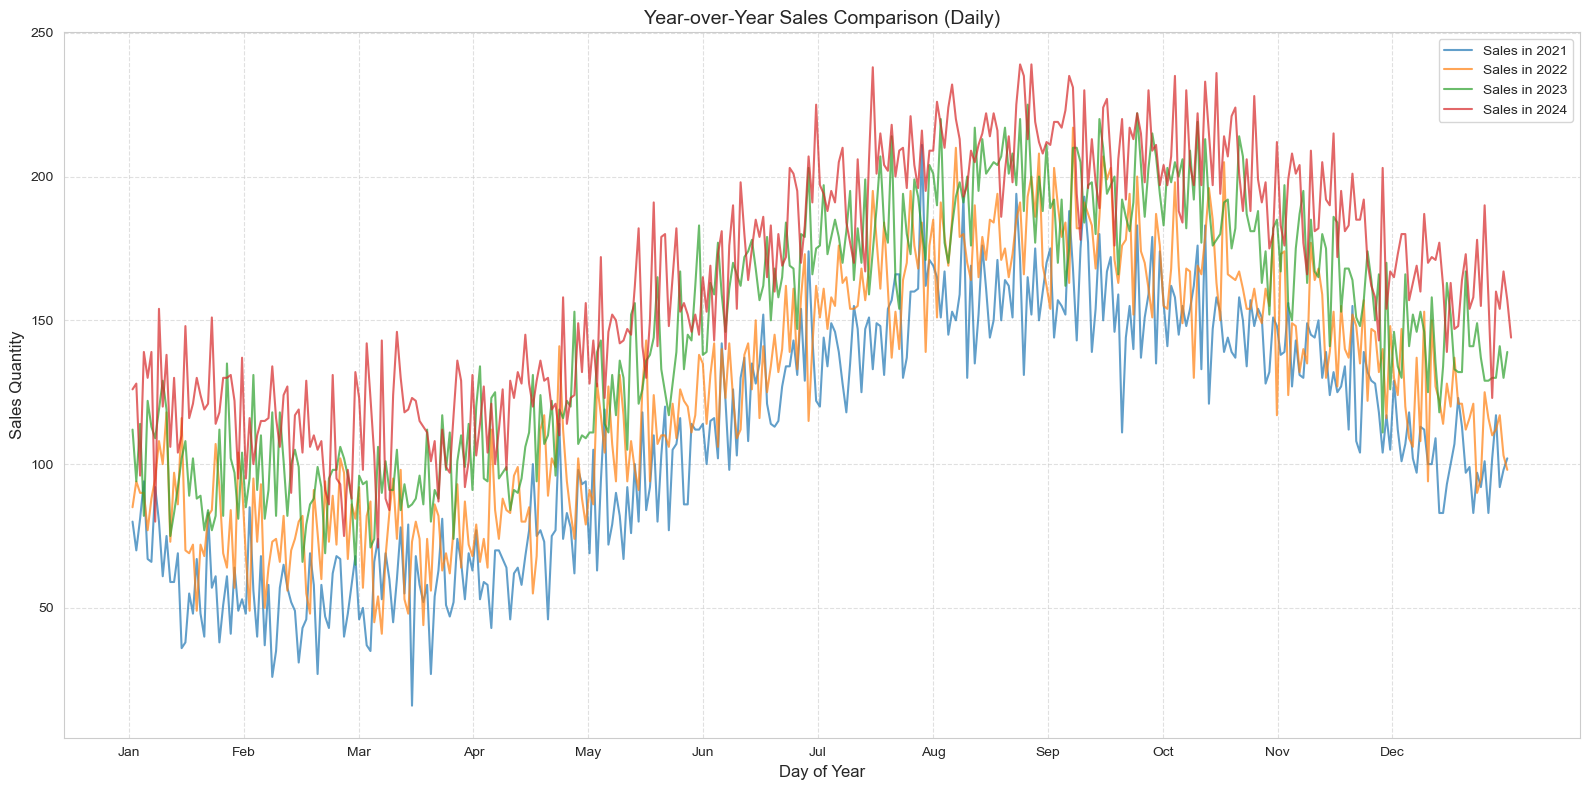

In [8]:
df['Year'] = df.index.year
df['Month'] = df.index.month
df['DayOfYear'] = df.index.dayofyear

plt.figure(figsize=(16, 8))
for year in df['Year'].unique():
    subset = df[df['Year'] == year]
    plt.plot(subset['DayOfYear'], subset['Sales'], label=f'Sales in {year}', alpha=0.7)

plt.title('Year-over-Year Sales Comparison (Daily)')
plt.xlabel('Day of Year')
plt.ylabel('Sales Quantity')
plt.xticks(np.linspace(0, 365, 13)[:-1], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 3.4. Distribution of Sales

Examining the distribution of sales can reveal skewness, presence of zero sales, or other unusual patterns.

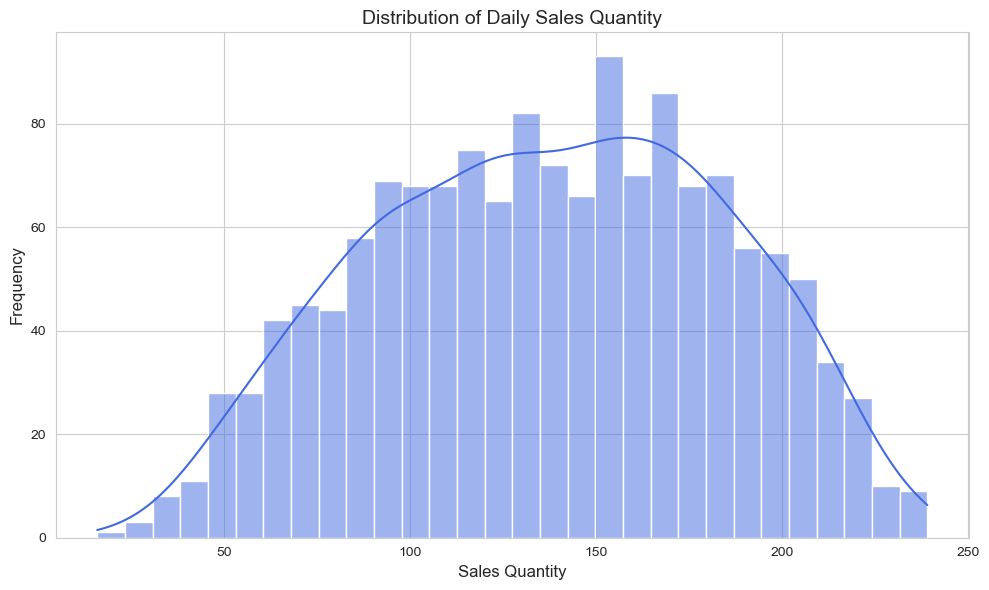


Statistical Summary of Sales:
count    1461.000000
mean      137.180698
std        46.836646
min        16.000000
25%       100.000000
50%       139.000000
75%       174.000000
max       239.000000
Name: Sales, dtype: float64


In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], kde=True, bins=30, color='royalblue')
plt.title('Distribution of Daily Sales Quantity')
plt.xlabel('Sales Quantity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print("\nStatistical Summary of Sales:")
print(df['Sales'].describe())

## 4. Mathematical Principles Underlying Time Series Components

The synthetic data generation is based on decomposing a time series into its fundamental components: trend, seasonality, and residual (noise). This additive model is commonly expressed as:

$$
Y_t = T_t + S_t + R_t
$$

Where:
- $Y_t$ is the observed value at time $t$.
- $T_t$ is the **trend component**, representing the long-term progression or regression of the series. In our synthetic data, this is modeled as a linear function of time: $T_t = a \cdot t + b$, where $a$ is the `linear_trend_slope`.
- $S_t$ is the **seasonal component**, representing patterns of change that repeat over fixed periods (e.g., daily, weekly, monthly, annually). For our annual seasonality, we used a sinusoidal function:
  $$
  S_t = A \cdot \sin\left(\frac{2\pi (t - \phi)}{P}\right)
  $$
  Here, $A$ is the `seasonal_amplitude`, $P$ is the period (e.g., 365.25 days for annual seasonality), and $\phi$ is a phase shift to align the peak/trough with a specific time of year (e.g., July for our seasonal beverage).
- $R_t$ is the **residual (or noise) component**, representing the random, unpredictable fluctuations that remain after accounting for trend and seasonality. This is often modeled as a normally distributed random variable with zero mean and a certain standard deviation, as we did with `np.random.normal`.

Understanding these components is critical for selecting appropriate forecasting models, as many models are designed to explicitly account for or decompose these elements.